In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,classification_report, confusion_matrix
import matplotlib.pyplot as plt
import collections
import scipy.linalg

In [3]:
df = pd.read_csv("../data/train_cleaned.csv")

In [4]:
df.shape

(61878, 94)

In [4]:
U, sigma, V = np.linalg.svd(df.sample(10000))


In [5]:
U.shape

(10000, 10000)

In [6]:
sigma

array([1111.83181988,  716.15991164,  652.03156272,  581.06652374,
        538.65548066,  470.64709545,  451.83702354,  432.80903022,
        403.1333492 ,  387.7983526 ,  377.09784109,  371.54150133,
        333.62156156,  327.67164298,  323.85461347,  317.73845386,
        311.1277388 ,  305.60560801,  291.77901614,  282.02579311,
        271.31587939,  259.48124649,  249.50183362,  243.9428019 ,
        242.71079801,  228.40352247,  222.84220127,  221.60546393,
        216.8568867 ,  212.72511356,  205.23869082,  199.14388783,
        193.32670886,  187.91190483,  185.23027984,  183.36753872,
        181.50684604,  180.51321104,  174.23531672,  173.75486226,
        169.85815046,  165.34869221,  163.38012923,  158.24613709,
        154.56602891,  153.19918222,  150.83477977,  145.86903809,
        144.55306242,  139.15015463,  134.07384864,  133.41839371,
        131.48191612,  128.90971601,  126.07574331,  123.17955422,
        121.35466658,  118.22085274,  114.95846322,  114.35188

In [7]:
sample = df.drop("target",axis=1).sample(10000)
U, sigma, V = np.linalg.svd(sample)


In [8]:
sample.index

Int64Index([ 2211, 40942, 58436, 12331, 15571,  3091,  4776, 23451, 28085,
            38783,
            ...
            36247, 61127, 49354, 59789,  5405, 20985, 14577, 40292, 42874,
             9788],
           dtype='int64', length=10000)

In [9]:
sigma

array([1028.02939059,  712.42500475,  653.41688893,  535.77367554,
        470.88521239,  454.36681512,  442.66720098,  440.06449882,
        412.6168597 ,  386.9259851 ,  377.52407803,  361.62375414,
        344.71339156,  328.98693661,  321.12294092,  313.05181112,
        298.38232133,  298.00844547,  273.03940877,  262.24469461,
        256.07700466,  251.24223283,  243.73874128,  237.88751925,
        233.98352081,  226.11103819,  219.69491382,  215.9464338 ,
        214.43578005,  203.89645675,  201.84384272,  199.74654087,
        192.33223762,  191.36489476,  188.23109704,  186.55299976,
        183.46328086,  178.28734525,  177.64386531,  173.82636907,
        169.83193918,  166.00460908,  164.98338593,  159.42799263,
        152.82846964,  150.74639348,  145.48984386,  142.51385215,
        139.19533188,  136.45202132,  131.69246498,  130.47289531,
        127.10170958,  126.34084735,  123.51389122,  120.68069534,
        118.5326427 ,  116.02180517,  114.69102531,  113.39709

In [10]:
print("V = ")
print(np.round(V, decimals=2))

V = 
[[-0.04 -0.05 -0.11 ... -0.04 -0.03 -0.02]
 [-0.    0.01 -0.31 ...  0.01 -0.03  0.  ]
 [ 0.04 -0.06 -0.15 ...  0.02  0.01  0.01]
 ...
 [-0.02  0.01 -0.   ...  0.01 -0.01 -0.01]
 [-0.   -0.01 -0.   ... -0.    0.01  0.  ]
 [ 0.   -0.01 -0.   ... -0.   -0.    0.  ]]


In [11]:
U[:, 0]

array([-0.00385642, -0.00430953, -0.01167091, ..., -0.00765864,
       -0.01225549, -0.00248019])

In [12]:
lis = U[:, 0].round(2)
collections.Counter(lis)

Counter({-0.07: 2,
         -0.06: 17,
         -0.05: 33,
         -0.04: 59,
         -0.03: 174,
         -0.02: 554,
         -0.01: 4744,
         -0.0: 4417})

In [13]:
np.sort(U[:, 0].round(4))

array([-0.0668, -0.0667, -0.0645, ..., -0.0001, -0.0001, -0.0001])

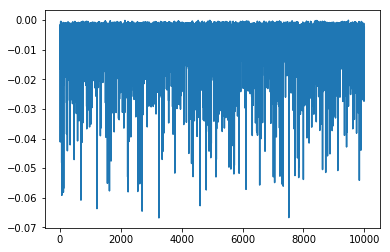

In [14]:
plt.plot(U[:, 0].round(6))
plt.show()

In [15]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])


In [16]:
print( "A calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=sample.index, columns=sample.columns))
print("\nError from actual value:\n")
print(sample - A_approx)

A calculated using only the first two components:

         feat_1    feat_2    feat_3    feat_4    feat_5    feat_6    feat_7  \
2211   0.175948  0.171598  1.094232  0.918327  0.034839  0.012583  0.110930   
40942  0.189120  0.230661  0.172386  0.194690  0.029593  0.014689  0.156678   
58436  0.536503  0.498455  3.874887  3.225146  0.110443  0.037746  0.318170   
12331  0.184574  0.189461  0.942649  0.801338  0.034941  0.013438  0.124025   
15571  0.531017  0.520180  3.252721  2.732299  0.104755  0.038035  0.336646   
3091   0.150155  0.178571  0.236028  0.232854  0.024272  0.011548  0.120698   
4776   0.084655  0.094245  0.272723  0.241525  0.014777  0.006349  0.062838   
23451  0.511089  0.640067  0.102777  0.239512  0.077132  0.040118  0.436959   
28085  0.191532  0.176938  1.405280  1.168701  0.039600  0.013450  0.112768   
38783  0.233224  0.225334  1.496604  1.253714  0.046541  0.016626  0.145320   
3177   0.122909  0.147343  0.167686  0.170462  0.019668  0.009482  0.099748   
4

In [17]:
A_approx.shape

(10000, 93)

In [18]:
U[:, :2].shape

(10000, 2)

In [66]:
svd = pd.DataFrame(A_approx, index=sample.index, columns=sample.columns)
svd.head()

target_df = pd.DataFrame(df.iloc[sample.index,93],index=sample.index)
svd = pd.concat([svd,target_df],axis=1)

In [67]:
svd

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
43436,0.288818,0.314727,1.179296,1.003878,0.061879,0.020815,0.197348,0.465876,0.542508,0.215682,...,0.321057,0.629148,0.336276,0.450377,0.436069,0.796041,0.202487,0.265253,0.114650,6
30487,0.035589,0.035768,0.172447,0.144602,0.007982,0.002474,0.023005,0.055234,0.065730,0.027387,...,0.042461,0.080473,0.042327,0.059100,0.059888,0.061465,0.024183,0.036229,0.013840,5
31505,0.250829,0.348942,0.343384,0.347355,0.044772,0.020364,0.204338,0.459119,0.499252,0.166998,...,0.206069,0.472436,0.269705,0.300738,0.224271,1.610370,0.195131,0.141447,0.106792,6
37262,0.649089,0.879799,1.097350,1.059695,0.118610,0.051997,0.518678,1.171379,1.283336,0.438383,...,0.555571,1.245235,0.704785,0.805961,0.627719,3.885479,0.499044,0.393296,0.274140,6
53303,0.946168,0.782118,6.104679,5.015391,0.232242,0.060662,0.538047,1.346724,1.684747,0.773455,...,1.291315,2.304580,1.175189,1.773053,1.937008,-0.417779,0.599882,1.161704,0.351820,8
2742,0.181900,0.172962,0.970125,0.807434,0.041968,0.012346,0.113287,0.275202,0.332290,0.142624,...,0.226506,0.420946,0.219251,0.313846,0.326225,0.194383,0.121089,0.196758,0.069796,2
49394,0.322148,0.443464,0.483284,0.478680,0.058059,0.026012,0.260392,0.586276,0.639461,0.215742,...,0.269179,0.611356,0.347777,0.391859,0.297627,2.011196,0.249416,0.187185,0.136708,8
47677,1.088656,1.203100,4.294063,3.667549,0.231254,0.078968,0.751189,1.768154,2.051142,0.808472,...,1.194025,2.355064,1.262583,1.677565,1.609415,3.204564,0.767522,0.980097,0.433761,7
19130,0.076323,0.049237,0.617166,0.500659,0.020377,0.004474,0.037365,0.098645,0.130752,0.066113,...,0.117494,0.199450,0.098890,0.159586,0.184544,-0.202079,0.044858,0.110000,0.027056,3
7425,0.096901,0.091020,0.526883,0.437900,0.022490,0.006543,0.059862,0.145798,0.176600,0.076279,...,0.121741,0.225340,0.117130,0.168530,0.176072,0.089943,0.064221,0.106133,0.037074,2


In [68]:
df_train,df_test = train_test_split(svd,random_state=42, test_size=0.3)

In [72]:
X_train = df_train.drop("target",axis=1)
X_test =  df_test.drop("target",axis=1)

In [73]:
y_train = df_train.target
y_test = df_test.target

In [74]:
lr = LogisticRegression()

In [75]:
lr.fit(X=X_train,y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
log_loss(y_test,lr.predict_proba(X_test))

1.7154217889737322

# delete all the content below

In [ ]:
#U, s, VT = np.linalg.svd(df.sample(50000))
sample2 = df.drop("target",axis=1).sample(30000)
U, s, VT = np.linalg.svd(sample2)

In [7]:
#U, s, VT = svd(sample)
# create m x n Sigma matrix
Sigma = np.zeros((sample2.shape[0], sample2.shape[1]))
print(Sigma.shape,s.shape)
# populate Sigma with n x n diagonal matrix
#Sigma[:sample.shape[0], :sample.shape[0]] = np.diag(s)
# select
n_elements = 10

#Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
#B = U.dot(Sigma.dot(VT))
#print(B)
# transform
#T = U.dot(Sigma)
#print(T)
T = sample2.dot(VT.T)
print(T)

(20000, 93) (93,)
               0          1          2          3          4          5  \
150    -3.421209   0.264261  -1.914310  -1.646896  -2.112450  -1.016279   
33237 -11.152879  -3.107374   0.898351   0.744626  -3.473452  -4.030366   
54084 -10.163863   1.156187  -5.582263   2.080345  -2.877387  -2.863504   
28164  -1.689531  -0.999966   0.315736  -2.758824   3.990681  -1.060042   
40504 -10.290597 -11.264014  17.720182   6.493983  -3.943377   0.682943   
41705 -17.510189 -19.602152  30.258915   8.694610  -4.304431   0.951267   
51451 -19.378257   5.896950  -4.027708  14.428121   7.306151  -1.613557   
697    -4.108563   0.318621  -2.303079  -1.681835  -2.599106  -0.498168   
39699 -14.622351  -7.525925   9.176312   5.194437   0.834571  -2.157016   
23333  -5.402328  -2.268131   0.730902  -6.176013   8.197900  -1.742651   
38390  -7.259465  -1.538894  -0.988569  -3.827626  -2.771587   0.988174   
14445  -0.810267  -0.444693   0.052733  -1.476015   2.191276  -0.306850   
692   -

In [9]:
svd2 = pd.DataFrame(T, index=sample2.index)
svd2.head()

target_df = pd.DataFrame(df.iloc[sample2.index,93],index=sample2.index)
svd2 = pd.concat([svd2,target_df],axis=1)

In [10]:
df_train,df_test = train_test_split(svd2,random_state=42, test_size=0.3)

X_train = df_train.drop("target",axis=1)
X_test =  df_test.drop("target",axis=1)

y_train = df_train.target
y_test = df_test.target

lr2 = LogisticRegression()

lr2.fit(X=X_train,y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
log_loss(y_test, lr2.predict_proba(X_test))

1.0959982632398488

In [25]:
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([
	[1,2,3,4,5,6,7,8,9,10],
	[11,12,13,14,15,16,17,18,19,20],
	[21,22,23,24,25,26,27,28,29,30]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(VT))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(VT.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
